## Adversary model


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import gurobipy as gp
# from gurobipy import GRB
# import gurobipy_pandas as gppd
from itertools import permutations
from math import factorial
from sympy import symbols, solve

### Load data

In [7]:
#Import import data handing functions
from import_data import *

In [9]:
#List of cities: Aakirkeby, Allinge, Gudhjem, Hasle, Klemensker, Nexo, Ostermarie, Ronne, Svaneke
# city='Allinge'
# start_date='2020-01-01'
# end_date='2023-03-01'
# granularity='hourly' #daily or hourly - some towns 
# data_test = select_data(city, start_date, end_date, granularity)

In [10]:
# plt.plot(data_test[data_test['heat_meter_serial_number'] == '78500106']['cumulative_hot_water_volume'].values)

In [11]:
#List of cities: Aakirkeby, Allinge, Gudhjem, Hasle, Klemensker, Nexo, Ostermarie, Ronne, Svaneke
city='Allinge'
start_date='2023-01-01'
end_date='2023-03-01'
granularity='hourly' #daily or hourly
data = select_data(city, start_date, end_date, granularity)
#load_data(data, number of meters (as range), number of days=end_data-start_date)
# meter_data = load_data(data, range(0,5), 1)

#Cumulative supplied energy e8 = m3 * T so dividing the volume will give us average temperature for the hour

c:\Users\junes\Desktop\BEOF\DP_codes\import_data.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["reading_datetime"] >= start_date][df["reading_datetime"] <= end_date]


In [12]:
data[data['heat_meter_serial_number'] == '80782776']

,heat_meter_serial_number,city,reading_datetime,heat_meter_connection,hot_water_supply_temperature,hot_water_return_temperature,cumulative_heat_energy,cumulative_hot_water_volume,cumulative_supplied_energy_e8,cumulative_returned_energy_e9
131157496,80782776,Allinge,2023-01-01 00:34:00,M-bus,68.260002,43.419998,78.779999,4695.200195,323503.0,254209.0
131157497,80782776,Allinge,2023-01-01 01:41:00,M-bus,67.669998,43.410000,78.800003,4695.870117,323549.0,254238.0
131157498,80782776,Allinge,2023-01-01 02:33:00,M-bus,67.870003,43.389999,78.809998,4696.379883,323583.0,254260.0
131157499,80782776,Allinge,2023-01-01 03:54:00,M-bus,67.839996,43.450001,78.830002,4697.180176,323638.0,254296.0
131157500,80782776,Allinge,2023-01-01 04:54:00,M-bus,68.230003,42.910000,78.849998,4697.770020,323678.0,254321.0
...,...,...,...,...,...,...,...,...,...,...
119345,80782776,Allinge,2023-02-28 19:59:00,M-bus,70.220001,58.230000,97.430000,5597.160156,386532.0,300816.0
2763566,80782776,Allinge,2023-02-28 20:59:00,M-bus,70.209999,57.930000,97.440002,5597.649902,386566.0,300845.0
178189,80782776,Allinge,2023-02-28 21:59:00,M-bus,69.940002,58.490002,97.449997,5598.140137,386600.0,300873.0
3272231,80782776,Allinge,2023-02-28 22:58:00,M-bus,69.870003,56.570000,97.449997,5598.620117,386634.0,300901.0


Olsker (Rønne - Allinge): 18 consumers

In [17]:
set_range = 24*(28+28) #24*31
meter_data = {
'm1' : {'data' : data[data['heat_meter_serial_number'] == '78500106'][0:set_range]},
'm2' : {'data' : data[data['heat_meter_serial_number'] == '78181671'][0:set_range]},
'm3_1' : {'data' : data[data['heat_meter_serial_number'] == '80126776'][0:set_range]},
'm3_2' : {'data' : data[data['heat_meter_serial_number'] == '80126815'][0:set_range]},
'm4' : {'data' : data[data['heat_meter_serial_number'] == '78181638'][0:set_range]},
# 'm5' : {'data' : data[data['heat_meter_serial_number'] == '78330138'][0:set_range]},
'm6' : {'data' : data[data['heat_meter_serial_number'] == '78182030'][0:set_range]},
'm7_1' : {'data' : data[data['heat_meter_serial_number'] == '78181974'][0:set_range]},
'm7_2' : {'data' : data[data['heat_meter_serial_number'] == '78181966'][0:set_range]},
'm8' : {'data' : data[data['heat_meter_serial_number'] == '78181672'][0:set_range]},
'm9' : {'data' : data[data['heat_meter_serial_number'] == '78182009'][0:set_range]},
'm10' : {'data' : data[data['heat_meter_serial_number'] == '78329899'][0:set_range]},
'm11' : {'data' : data[data['heat_meter_serial_number'] == '78181683'][0:set_range]},
'm12' : {'data' : data[data['heat_meter_serial_number'] == '78181976'][0:set_range]},
'm13' : {'data' : data[data['heat_meter_serial_number'] == '78181676'][0:set_range]},
'm14' : {'data' : data[data['heat_meter_serial_number'] == '78181663'][0:set_range]},
'm15' : {'data' : data[data['heat_meter_serial_number'] == '80126750'][0:set_range]},
'm16' : {'data' : data[data['heat_meter_serial_number'] == '78182015'][0:set_range]}
}

# l: length of the pipeline (m), d0: inner diameter (water flow) (mm), d1: outer diameter (mm), d2: insulation diameter (mm)
branch_data= {
'm1' : {'l':93.776+21.077, 'd0': (40+25)/2, 'd1': (48.3+26)/2, 'd2': (180+125)/2}, #Should be length weighted average for diameters
'm2' : {'l':40.43, 'd0': 26.2, 'd1': 32, 'd2': 110},
'm3_1' : {'l':240.459, 'd0': 40, 'd1': 48.3, 'd2': 180} ,
'm3_2' : {'l':240.459+22.869+27.341, 'd0': (40+32+32)/3, 'd1': (48.3+42.4+42.4)/3, 'd2': (180+180+180)/3} ,
'm4' : {'l':38.333, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
# 'm5' : {'l':8.8, 'd0': 25, 'd1': 26, 'd2': 125} ,
'm6' : {'l':99.298, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
'm7_1' : {'l':28.066+5.779, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
'm7_2' : {'l':28.066+3.697, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
'm8' : {'l':24.677, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
'm9' : {'l':14.052, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
'm10' : {'l':41.388, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
'm11' : {'l':14.88, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
'm12' : {'l':27.376, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
'm13' : {'l':30.078, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
'm14' : {'l':9.132, 'd0': 26.2, 'd1': 32, 'd2': 110} ,
'm15' : {'l':26.453, 'd0': 32, 'd1': 32, 'd2': 140} ,
'm16' : {'l':11.206, 'd0': 26.2, 'd1': 32, 'd2': 110} 
}

In [18]:
meter_data.keys()

dict_keys(['m1', 'm2', 'm3_1', 'm3_2', 'm4', 'm6', 'm7_1', 'm7_2', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'm16'])

In [26]:
meter_keys = ['m1', 'm2', 'm3_1', 'm3_2', 'm4', 'm6', 'm7_1', 'm7_2', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'm16']

In [27]:
for key, value in meter_data.items():
    avg_supply_temp = meter_data[key]['data']['cumulative_supplied_energy_e8']/meter_data[key]['data']['cumulative_hot_water_volume'] 
    meter_data[key]['avg_supply_temp'] = avg_supply_temp

In [28]:
# meter_data[meter_no]['data']['cumulative_hot_water_volume'].values.shape

In [44]:
for key, value in meter_data.items():
    print(key, meter_data[key]['avg_supply_temp'])

m1 131663861    68.375786
131663862    68.375740
131663863    68.375687
131663864    68.375923
131663865    68.375969
               ...    
1330298      68.450500
2329555      68.450706
253409       68.450729
2290273      68.450844
2995407      68.450996
Length: 1344, dtype: float32
m2 131699951    66.722160
131699952    66.722290
131699953    66.722290
131699954    66.722542
131699955    66.722534
               ...    
204305       66.958725
831378       66.958710
1183332      66.959282
3396313      66.959503
1437322      66.959602
Length: 1344, dtype: float32
m3_1 132060415    67.835129
132060416    67.834595
132060417    67.834900
132060418    67.835037
132060419    67.835182
               ...    
3624057      67.947105
1117887      67.947174
531192       67.947105
3898058      67.947647
883043       67.947411
Length: 1344, dtype: float32
m3_2 130245049    68.047638
130245050    68.047607
130245051    68.047577
130245052    68.047806
130245053    68.047859
               ...    


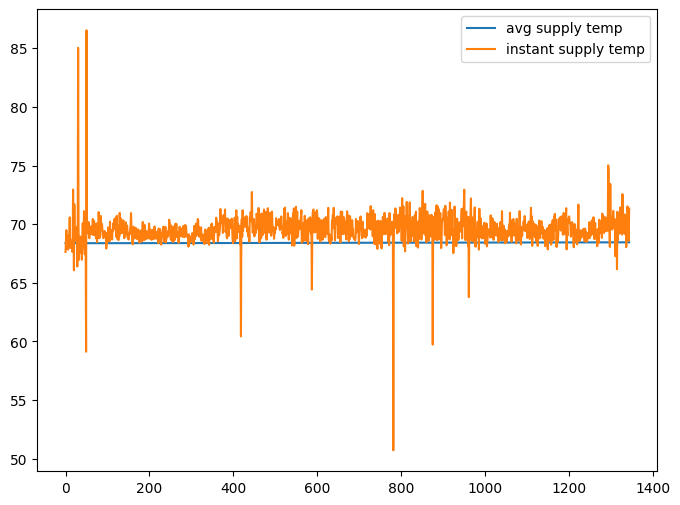

In [45]:
meter = 'm1'
plt.plot(np.array(meter_data[meter]['avg_supply_temp']), label='avg supply temp')
plt.plot(np.array(meter_data[meter]['data']['hot_water_supply_temperature']) , label='instant supply temp')
plt.legend()

In [46]:
for i, meter in enumerate(meter_keys)[0:5]:
    print(i, meter)

TypeError: 'enumerate' object is not subscriptable

Text(0.5, 1.0, 'avg_temp')

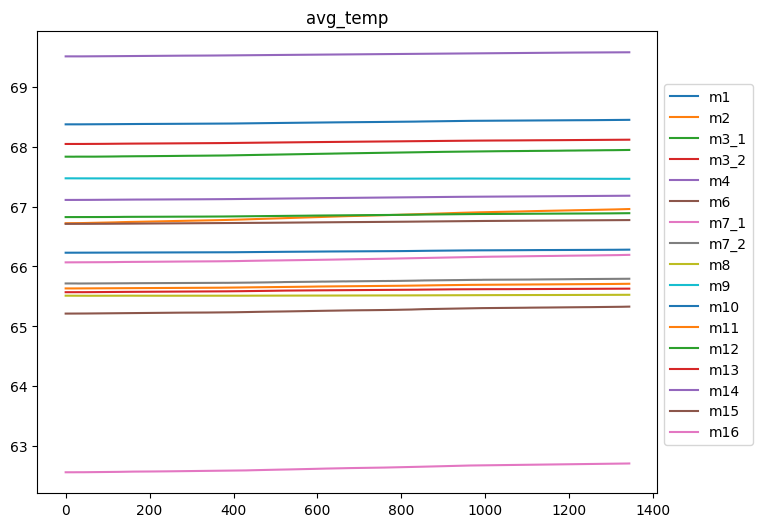

In [47]:
for i, meter in enumerate(meter_keys):
    plt.plot(np.array(meter_data[meter]['avg_supply_temp']), label=f'{meter}')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.9), ncol=1)
plt.rcParams['figure.figsize'] = [8, 6]
plt.title('avg_temp')

In [48]:
24*(28+28)

1344

In [49]:
avgT_m_matrix = np.zeros((len(meter_data), 24*(28+28)))
for i, meter in enumerate(meter_data.keys()):
    for t in range(1, 24 * (28+28)):
        avgT_m_matrix[i, t] = np.array(meter_data[meter]['avg_supply_temp'])[t]

In [50]:
avgT_m_matrix[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

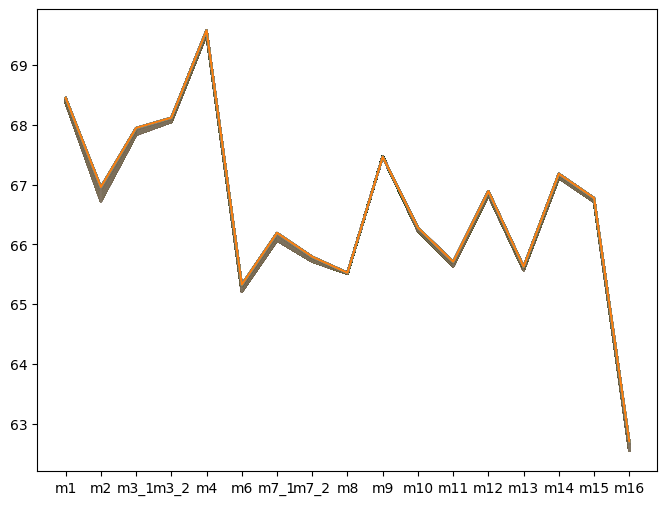

In [51]:
plt.plot(meter_keys, avgT_m_matrix[:,1:-1]);

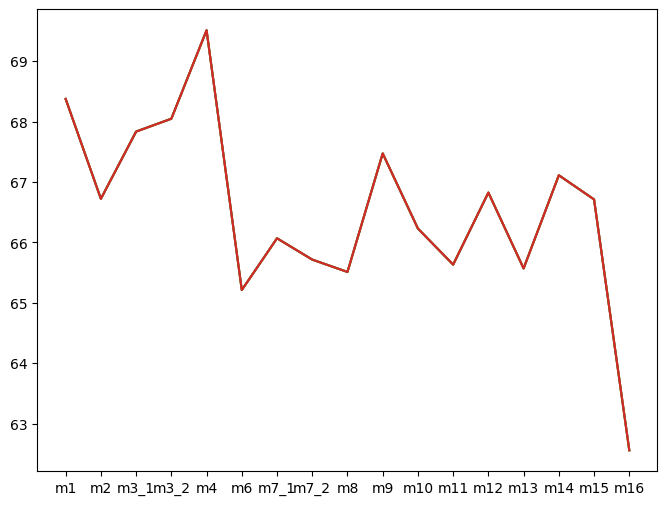

In [52]:
plt.plot(meter_keys, [np.array(meter_data[meter]['avg_supply_temp'])[0] for meter in meter_keys])
plt.plot(meter_keys, [np.array(meter_data[meter]['avg_supply_temp'])[0] for meter in meter_keys])
plt.plot(meter_keys, [np.array(meter_data[meter]['avg_supply_temp'])[0] for meter in meter_keys])
plt.plot(meter_keys, [np.array(meter_data[meter]['avg_supply_temp'])[0] for meter in meter_keys])

plt.rcParams['figure.figsize'] = [12, 4]


In [53]:
for key, value in meter_data.items():
    print(key, meter_data[key]['data']['reading_datetime'])
    print(key, meter_data[key]['data']['hot_water_supply_temperature'])

m1 131663861   2023-01-01 00:59:00
131663862   2023-01-01 01:59:00
131663863   2023-01-01 02:59:00
131663864   2023-01-01 03:58:00
131663865   2023-01-01 04:58:00
                    ...        
1330298     2023-02-25 17:59:00
2329555     2023-02-25 18:58:00
253409      2023-02-25 19:58:00
2290273     2023-02-25 20:58:00
2995407     2023-02-25 21:58:00
Name: reading_datetime, Length: 1344, dtype: datetime64[ns]
m1 131663861    67.629997
131663862    68.580002
131663863    69.489998
131663864    68.500000
131663865    67.870003
               ...    
1330298      71.510002
2329555      70.739998
253409       69.669998
2290273      68.570000
2995407      71.320000
Name: hot_water_supply_temperature, Length: 1344, dtype: float32
m2 131699951   2023-01-01 00:59:00
131699952   2023-01-01 01:58:00
131699953   2023-01-01 02:58:00
131699954   2023-01-01 03:58:00
131699955   2023-01-01 04:58:00
                    ...        
204305      2023-02-25 18:59:00
831378      2023-02-25 19:58:00
11833

Remove outliers from data

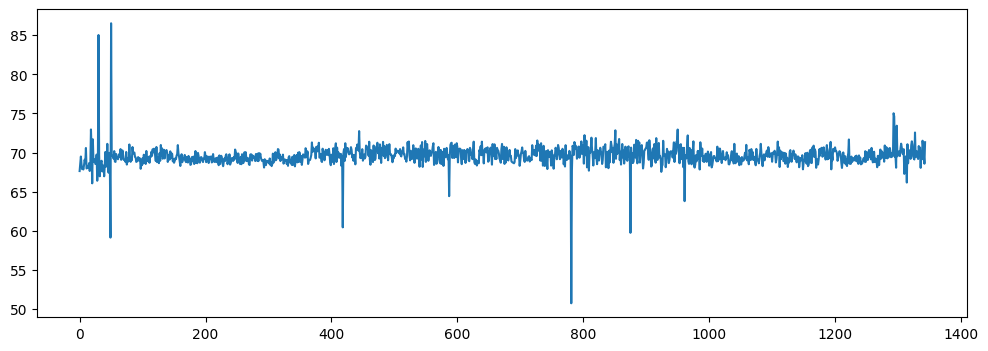

In [54]:
array1 = meter_data['m1']['data']['hot_water_supply_temperature'].values
plt.plot(array1)

In [55]:
def fill_outliers(array, lim):
    df = pd.DataFrame(array)
    df1 = df.copy()
    outliers = np.abs(df1.diff()) > lim
    df1[outliers] = np.nan
    df1_filled = df1.interpolate(method='linear',limit=3, limit_direction='both')
    return df1_filled.values.flatten()


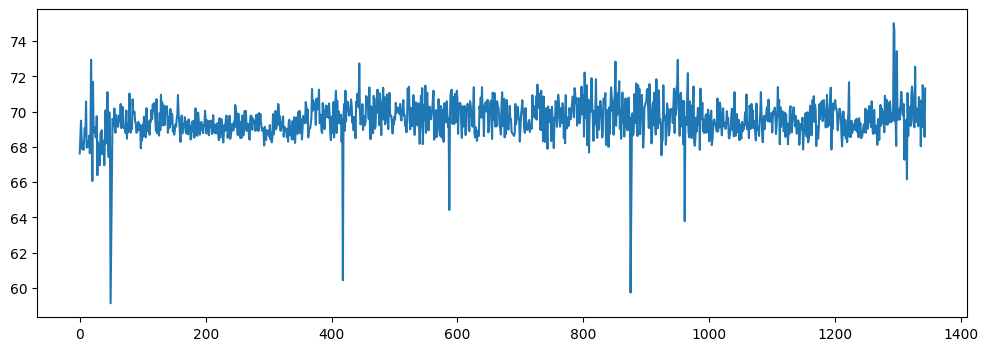

In [57]:
lim = 10
plt.plot(fill_outliers(array1, lim))

Branch pipeline temperature loss calculation

In [34]:
meter_data.keys()

dict_keys(['m1', 'm2', 'm3_1', 'm3_2', 'm4', 'm6', 'm7_1', 'm7_2', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'm16'])

In [58]:
#Calculate the main nodal temperature taking into account heat loss through the branch pipeline
#Heat loss depends on the temperature difference(in and out of the pipe) and mass flow 

def temp_loss(meter_data, branch_data, meter_no, t, T_diff, lim):
    k = 0.025 # W/(m*K) #https://smartenergysystems.eu/wp-content/uploads/2019/04/thrid_-_oliver_martin-du_pan.pdf
    T_in_filled = fill_outliers(meter_data[meter_no]['data']['hot_water_supply_temperature'].values, lim)
    T_meter = T_in_filled[t] # C
    T_out = T_meter - T_diff # C
    ΔT = T_meter - T_out # C
    L = branch_data[meter_no]['l'] # m 
    r_out = branch_data[meter_no]['d2']/(2*1000) # m
    r_in = branch_data[meter_no]['d0']/(2*1000) # m

    Q = 2*np.pi*L*k*(ΔT)/np.log(r_out/r_in) # W

    Cp = 1.1622 # 4184 J/kg.K = 1.1622 Wh/kg.K
    mf = (meter_data[meter_no]['data']['cumulative_hot_water_volume'].values[t]-meter_data[meter_no]['data']['cumulative_hot_water_volume'].values[t-1])*1000 #kg/h
    T_node = T_meter - (Q / (mf * Cp)) 

    # print('Q', Q, ' W')
    # print('T_in', T_in, ' C')
    # print('end_temp', end_temp, ' C')

    # result = {'Q': Q,
    #           'T_in': T_in,
    #           'end_temp': end_temp}

    return Q, T_meter, T_node

# Where:
# Q is the heat transfer rate
# k is the thermal conductivity of the material
# A is the cross-sectional area perpendicular to the heat flow
# ΔT is the temperature difference across the material
# L is the length of the material in the direction of heat flow

In [212]:
#Calculate the main nodal temperature taking into account heat loss through the branch pipeline
#Heat loss depends on the temperature difference(in and out of the pipe) and mass flow 

def temp_loss(meter_data, branch_data, meter_no, t, T_diff, lim):
    k = 0.025 # W/(m*K) #https://smartenergysystems.eu/wp-content/uploads/2019/04/thrid_-_oliver_martin-du_pan.pdf
    T_in_filled = fill_outliers(np.array(meter_data[meter_no]['avg_supply_temp']), lim)
    T_meter = T_in_filled[t] # C
    T_out = T_meter - T_diff # C
    ΔT = T_meter - T_out # C
    L = branch_data[meter_no]['l'] # m 
    r_out = branch_data[meter_no]['d2']/(2*1000) # m
    r_in = branch_data[meter_no]['d0']/(2*1000) # m

    Q = 2*np.pi*L*k*(ΔT)/np.log(r_out/r_in) # W

    Cp = 1.1622 # 4184 J/kg.K = 1.1622 Wh/kg.K
    mf = (meter_data[meter_no]['data']['cumulative_hot_water_volume'].values[t]-meter_data[meter_no]['data']['cumulative_hot_water_volume'].values[t-1])*1000 #kg/h
    T_node = (Q / (mf * Cp)) + T_meter

    # print('Q', Q, ' W')
    # print('T_in', T_in, ' C')
    # print('end_temp', end_temp, ' C')

    # result = {'Q': Q,
    #           'T_in': T_in,
    #           'end_temp': end_temp}

    return Q, T_meter, T_node

In [61]:
node_temp1 = {}
T_diff = 40
lim = 5
for meter in meter_data.keys():
    t = 1
    Q, T_in, end_temp = temp_loss(meter_data, branch_data, meter, t, T_diff, lim)
    node_temp1[meter] = {'Q':Q, 'T_in':T_in, 'end_temp':end_temp}

In [87]:
meter_no = 'm3_1'
t = 1
T_diff = 40
lim = 5

k = 0.025 # W/(m*K) #https://smartenergysystems.eu/wp-content/uploads/2019/04/thrid_-_oliver_martin-du_pan.pdf
T_in_filled = fill_outliers(meter_data[meter_no]['data']['hot_water_supply_temperature'].values, lim)
T_in = T_in_filled[t] # C
T_out = T_in - T_diff # C
ΔT = T_in - T_out # C
L = branch_data[meter_no]['l'] # m 
r_out = branch_data[meter_no]['d2']/(2*1000) # m
r_in = branch_data[meter_no]['d0']/(2*1000) # m

Q = 2*np.pi*L*k*(ΔT)/np.log(r_out/r_in) # W

Cp = 1.1622 # 4184 J/kg.K = 1.1622 Wh/kg.K
mf = (meter_data[meter_no]['data']['cumulative_hot_water_volume'].values[t]-meter_data[meter_no]['data']['cumulative_hot_water_volume'].values[t-1])*1000 #kg/h
end_temp = T_in - (Q / (mf * Cp)) 


In [91]:
T_in

69.15

In [90]:
T_in_filled

array([69.06    , 69.15    , 66.39    , ..., 70.979996, 73.75    ,
       68.99    ], dtype=float32)

In [95]:
(Q / (mf * Cp)) 

14.391123164223258

In [93]:
Q

1004.5018022459047

In [94]:
mf

60.05859375

In [88]:
end_temp

54.75887836165565

In [225]:
import sympy as sym
# sym.init_printing()
x,y,z = sym.symbols('x,y,z')
c1 = sym.Symbol('c1')
f = sym.Eq(2*x**2+y+z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)

sym.solve([f,g,h],(x,y,z))

ModuleNotFoundError: No module named 'sympy'

In [103]:
meter_no = 'm3_1'
print('mf: ', (meter_data[meter_no]['data']['cumulative_hot_water_volume'].values[t]-meter_data[meter_no]['data']['cumulative_hot_water_volume'].values[t-1])*1000) #kg/h
print('length: ', branch_data[meter_no]['l']) # m 

mf:  60.05859375
length:  240.459


In [201]:
meter_keys = ['m1', 'm2', 'm3_1', 'm3_2', 'm4', 'm6', 'm7_1', 'm7_2', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'm16']

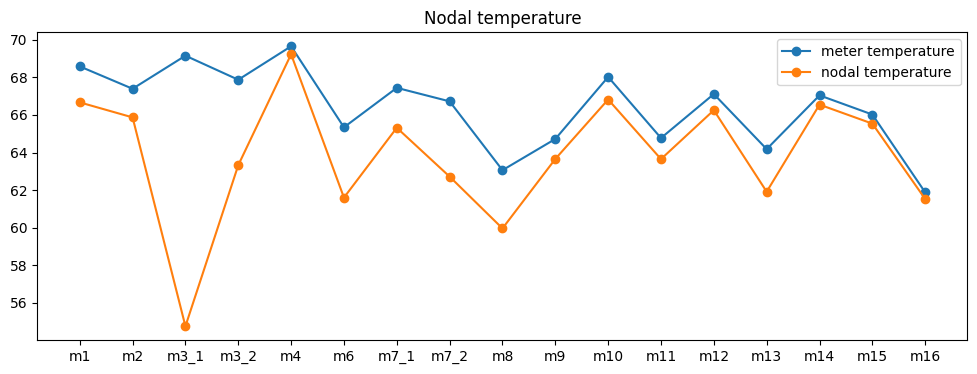

In [62]:
plt.plot(meter_keys, [meter_data[m]['data']['hot_water_supply_temperature'].values[1] for m in meter_keys], 'o-', label='meter temperature')
plt.plot(meter_keys, [node_temp1[m]['end_temp'] for m in meter_keys], 'o-', label='nodal temperature')
plt.rcParams['figure.figsize'] = [12, 4]
plt.title('Nodal temperature')
plt.legend()

In [59]:
Q_matrix = np.zeros((len(meter_data), 24*(28+28)-1))
T_in_matrix = np.zeros((len(meter_data), 24*(28+28)-1))
end_temp_matrix = np.zeros((len(meter_data), 24*(28+28)-1))

T_diff = 40
lim = 5
for i, meter in enumerate(meter_data.keys()):
    for t in range(1, 24 * (28+28) - 1):
        Q_matrix[i, t], T_in_matrix[i, t], end_temp_matrix[i,t] = temp_loss(meter_data, branch_data, meter, t, T_diff, lim)

In [217]:
T_in_matrix[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

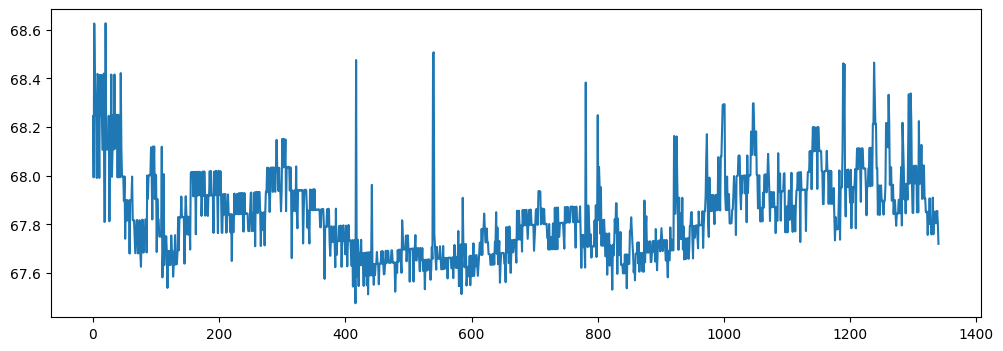

In [218]:
plt.plot(end_temp_matrix[1,1:-1])

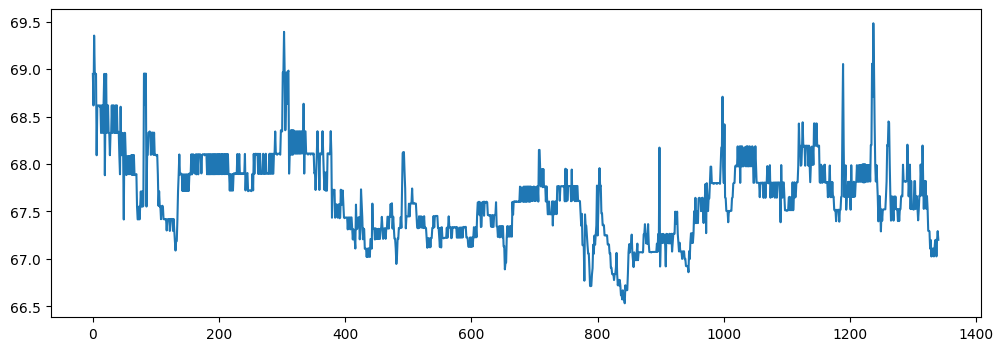

In [219]:
plt.plot(end_temp_matrix[5,1:-1])

Text(0.5, 1.0, 'Nodal temperature (average over 1 month)')

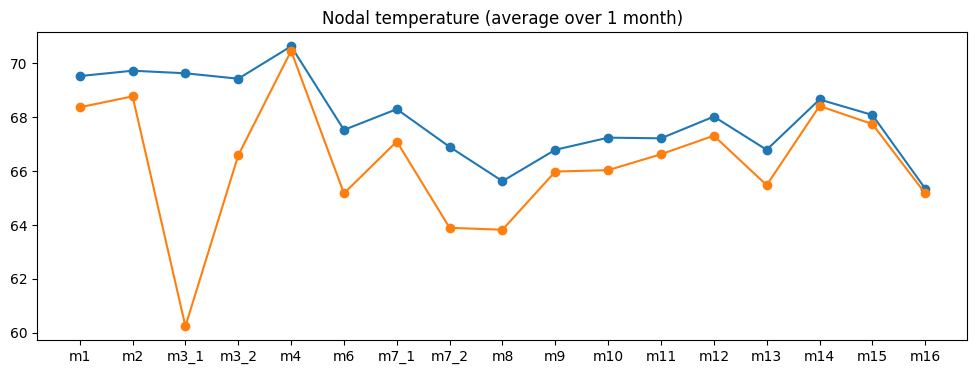

In [63]:
T_in_avg = np.mean(T_in_matrix, axis=1)
T_end_avg = np.mean(end_temp_matrix[:,1:-1], axis=1)
plt.plot(meter_keys, T_in_avg, 'o-', label='without losses')
plt.plot(meter_keys, T_end_avg, 'o-', label='with losses')
plt.rcParams['figure.figsize'] = [12, 4]
plt.title('Nodal temperature (average over 1 month)')

In [221]:
T_end_avg

array([69.6218382 , 67.84256342, 77.32731635, 70.97870825, 69.76776952,
       67.67024084, 67.37332521, 68.80159843, 67.36763618, 68.32603981,
       67.50710507, 66.30944975, 67.61510923, 66.95901728, 67.43843948,
       67.12877387, 62.85299195])

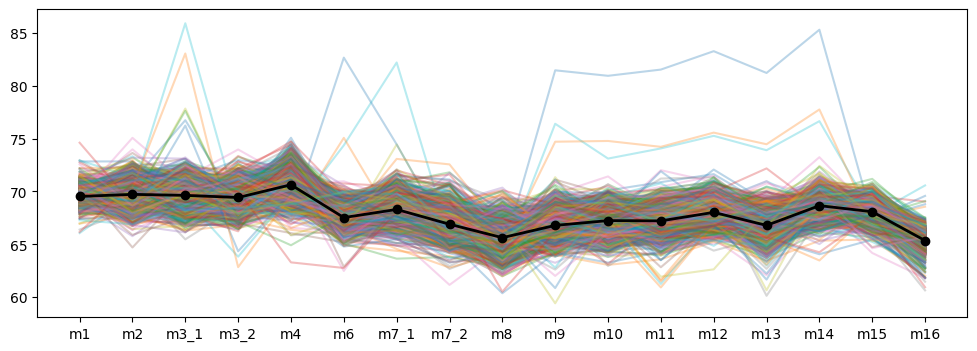

In [64]:
plt.plot(meter_keys, T_in_matrix[:,1:-1], alpha=0.3)
plt.plot(meter_keys, np.mean(T_in_matrix, axis=1), color='black', linewidth=2, marker='o')

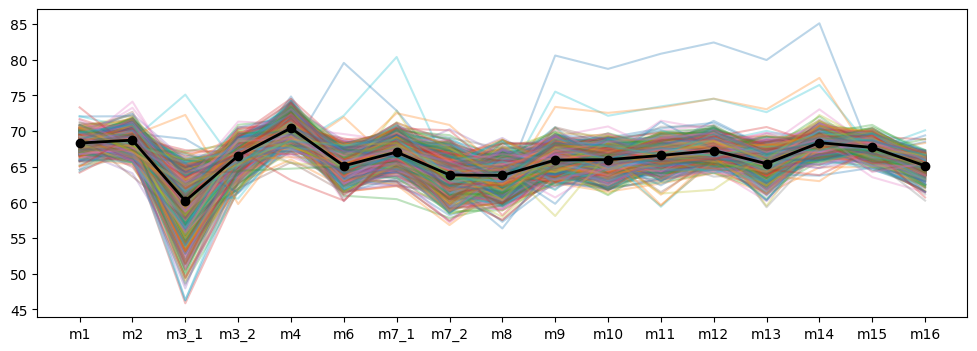

In [65]:
plt.plot(meter_keys, end_temp_matrix[:,1:-1], alpha=0.3)
plt.plot(meter_keys, np.mean(end_temp_matrix, axis=1), color='black', linewidth=2, marker='o')

array([ 466.45573094,  176.92641244, 1003.75384856, 1107.93553427,
        167.74969498,  434.5396711 ,  148.10968165,  138.99860594,
        107.98944051,   61.49319682,  181.11873258,   65.11662174,
        119.80058043,  131.62484871,   39.96270092,  112.53107099,
         49.03876769])

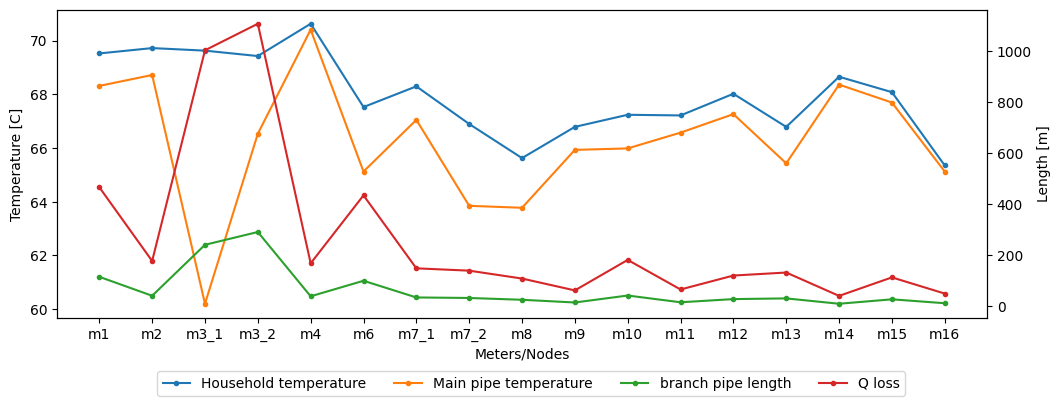

In [115]:
fig, ax1 = plt.subplots()

ax1.plot(meter_keys, np.mean(T_in_matrix, axis=1), marker='.', label='Household temperature')
ax1.plot(meter_keys, np.mean(end_temp_matrix, axis=1), marker='.', label='Main pipe temperature')

ax2 = ax1.twinx()
ax2.plot(meter_keys, [branch_data[meter]['l'] for meter in meter_keys], label='branch pipe length', marker='.', color='C2')
ax2.plot(meter_keys, np.mean(Q_matrix, axis=1), label='Q loss', marker='.', color='C3')

ax1.set_xlabel('Meters/Nodes')
ax1.set_ylabel('Temperature [C]')
ax2.set_ylabel('Length [m]')

# Combine the legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, -0.15), ncol=4)

Text(0.5, 1.0, 'Nodal temperature with losses')

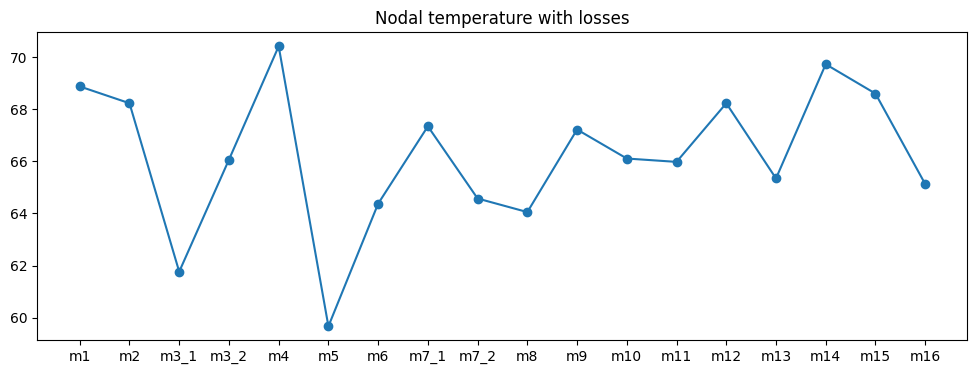

In [266]:
plt.plot(meter_keys, [node_temp1[m]['end_temp'] for m in meter_keys], 'o-')
plt.rcParams['figure.figsize'] = [12, 4]
plt.title('Nodal temperature with losses')

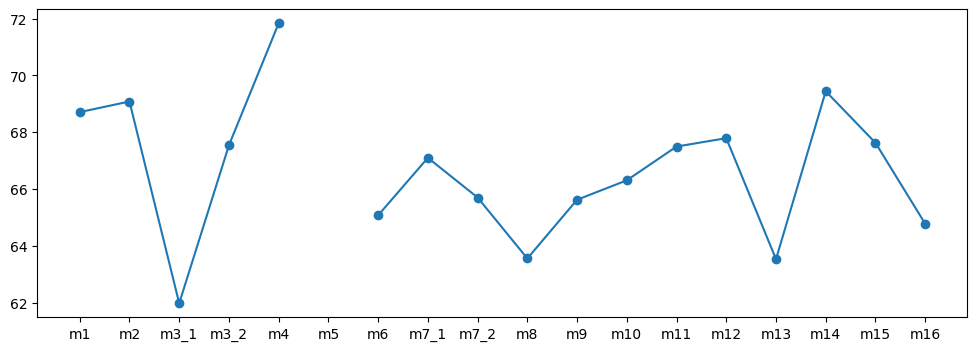

In [267]:
plt.plot(meter_keys, [node_temp2[m]['end_temp'] for m in meter_keys], 'o-')
plt.rcParams['figure.figsize'] = [12, 4]

In [ ]:
meter_data['m1']['data']['cumulative_hot_water_volume'].values[0]

7604.49

In [195]:
A

0.0010839456767634944

In [182]:
43*2/24

3.5833333333333335

In [181]:
0.1*24

2.4000000000000004

In [169]:
meter_data['m5']['data']['cumulative_hot_water_volume']

252124     2373.429932
2856847    2373.540039
3209120    2373.540039
Name: cumulative_hot_water_volume, dtype: float32

In [161]:
T_in

69.42

In [160]:
mf * Cp

8837938.550390624

In [158]:
(Q1 / (mf * Cp)) 

2.669649246182969e-13

In [159]:
(Q2 / (mf * Cp)) 

1.3204530411537956e-05

In [ ]:
for key, value in meter_data.items():
    meter_data[key]['branch'] = f'{key}_branch'

In [90]:
m1['cumulative_supplied_energy_e8']/m1['cumulative_hot_water_volume'] 

587040     68.415367
2623812    68.415428
1134908    68.415520
dtype: float32

In [91]:
m2['cumulative_supplied_energy_e8']/m2['cumulative_hot_water_volume'] 

1242160    66.854195
1652779    66.854683
3337357    66.854919
dtype: float32

The idea is that we need to find the nodal temperatures. So calculate the temperature loss from the node connecting to the main pipes to the meters. When we have the nodal temperatures, we can deduce orientation using downstream topology.

In [49]:
set_range = 3

In [56]:
# meters in Klemensker
# m1 = data[data['heat_meter_serial_number'] == '78330035'][0:set_range]
# m2 = data[data['heat_meter_serial_number'] == '78329894'][0:set_range]
# m3 = data[data['heat_meter_serial_number'] == '78330043'][0:set_range]
# m4 = data[data['heat_meter_serial_number'] == '78330039'][0:set_range]
# m5 = data[data['heat_meter_serial_number'] == '78330137'][0:set_range]
# m6 = data[data['heat_meter_serial_number'] == '78330036'][0:set_range]

In [64]:
m1_branch = {'pipe_length':19.739}
m2_branch = 18.532
m3_branch = 14.409
m4_branch = 20.3
m5_branch = 11.216
m6_branch = 29.067


In [66]:
m1

,heat_meter_serial_number,city,reading_datetime,heat_meter_connection,hot_water_supply_temperature,hot_water_return_temperature,cumulative_heat_energy,cumulative_hot_water_volume,cumulative_supplied_energy_e8,cumulative_returned_energy_e9
1661233,78330035,Klemensker,2023-02-01 00:58:00,M-bus,70.830002,34.419998,84.690002,2664.469971,182175.0,107647.0
507291,78330035,Klemensker,2023-02-01 01:58:00,M-bus,70.410004,34.330002,84.690002,2664.560059,182181.0,107650.0
1152861,78330035,Klemensker,2023-02-01 02:59:00,M-bus,70.389999,34.279999,84.699997,2664.649902,182187.0,107653.0


In [58]:
m1['cumulative_supplied_energy_e8']/m1['cumulative_hot_water_volume'] 

1661233    68.371948
507291     68.371887
1152861    68.371834
dtype: float32

In [59]:
m2['cumulative_supplied_energy_e8']/m2['cumulative_hot_water_volume']

799947     66.873817
1132604    66.874611
15777      66.874596
dtype: float32

In [60]:
m3['cumulative_supplied_energy_e8']/m3['cumulative_hot_water_volume']

3326165    71.012665
3639323    71.012596
1152901    71.012665
dtype: float32

In [61]:
m4['cumulative_supplied_energy_e8']/m4['cumulative_hot_water_volume']

507306     70.859055
1133200    70.859047
546529     70.859215
dtype: float32

In [62]:
m5['cumulative_supplied_energy_e8']/m5['cumulative_hot_water_volume']

2856839    66.738281
3718133    66.738594
3737828    66.739197
dtype: float32

In [63]:
m6['cumulative_supplied_energy_e8']/m6['cumulative_hot_water_volume']

1426206    67.355797
3795696    67.355637
3815160    67.355759
dtype: float32

In [17]:
#List of cities: Aakirkeby, Allinge, Gudhjem, Hasle, Klemensker, Nexo, Ostermarie, Ronne, Svaneke
city='Klemensker'
start_date='2023-02-01'
end_date='2023-02-02'
granularity='hourly' #daily or hourly
data_Klemensker = select_data(city, start_date, end_date, granularity)
#load_data(data, number of meters (as range), number of days=end_data-start_date)
meter_data = load_data(data, range(0,5), 1)

c:\Users\junes\Desktop\BEOF\DP_codes\import_data.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["reading_datetime"] >= start_date][df["reading_datetime"] <= end_date]
c:\Users\junes\Desktop\BEOF\DP_codes\import_data.py:83: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_select_resample = df_select.resample('D', on='reading_datetime').mean()
c:\Users\junes\Desktop\BEOF\DP_codes\import_data.py:83: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_select_resample = df_select.resample('D', on='reading_datetime').mean()
c:\Users\junes\Desktop\BEOF\DP_codes\import

In [24]:
data_Klemensker[data_Klemensker['heat_meter_serial_number'] == '78181898'][0:3]

,heat_meter_serial_number,city,reading_datetime,heat_meter_connection,hot_water_supply_temperature,hot_water_return_temperature,cumulative_heat_energy,cumulative_hot_water_volume,cumulative_supplied_energy_e8,cumulative_returned_energy_e9
2888088,78181898,Klemensker,2023-02-01 00:59:00,M-bus,60.389999,20.60,35.16,11530.330078,806120.0,775240.0
675870,78181898,Klemensker,2023-02-01 01:59:00,M-bus,52.430000,21.16,35.16,11530.349609,806121.0,775240.0
3181898,78181898,Klemensker,2023-02-01 02:58:00,M-bus,52.380001,20.41,35.16,11530.360352,806121.0,775240.0


In [23]:
data_Klemensker[data_Klemensker['heat_meter_serial_number'] == '78181927'][0:3]

,heat_meter_serial_number,city,reading_datetime,heat_meter_connection,hot_water_supply_temperature,hot_water_return_temperature,cumulative_heat_energy,cumulative_hot_water_volume,cumulative_supplied_energy_e8,cumulative_returned_energy_e9
2536275,78181927,Klemensker,2023-02-01 00:58:00,M-bus,71.849998,67.550003,86.860001,11590.459961,796730.0,720322.0
812730,78181927,Klemensker,2023-02-01 01:59:00,M-bus,71.680000,66.489998,86.860001,11591.070312,796774.0,720362.0
3534105,78181927,Klemensker,2023-02-01 02:58:00,M-bus,71.900002,67.419998,86.870003,11591.679688,796817.0,720403.0


In [27]:
796730.0/11590.459961

68.74015377136593

In [25]:
data_Klemensker[data_Klemensker['heat_meter_serial_number'] == '78181903'][0:3]

,heat_meter_serial_number,city,reading_datetime,heat_meter_connection,hot_water_supply_temperature,hot_water_return_temperature,cumulative_heat_energy,cumulative_hot_water_volume,cumulative_supplied_energy_e8,cumulative_returned_energy_e9
2477605,78181903,Klemensker,2023-02-01 00:59:00,M-bus,67.800003,44.720001,95.449997,4708.660156,314989.0,231107.0
2477606,78181903,Klemensker,2023-02-01 01:59:00,M-bus,68.870003,44.939999,95.449997,4708.759766,314996.0,231111.0
1693136,78181903,Klemensker,2023-02-01 02:59:00,M-bus,68.809998,44.880001,95.449997,4708.870117,315003.0,231116.0


In [26]:
data_Klemensker[data_Klemensker['heat_meter_serial_number'] == '78181892'][0:3]

,heat_meter_serial_number,city,reading_datetime,heat_meter_connection,hot_water_supply_temperature,hot_water_return_temperature,cumulative_heat_energy,cumulative_hot_water_volume,cumulative_supplied_energy_e8,cumulative_returned_energy_e9
2065362,78181892,Klemensker,2023-02-01 00:59:00,M-bus,68.529999,36.290001,124.080002,3515.889893,236391.0,127262.0
2849019,78181892,Klemensker,2023-02-01 01:58:00,M-bus,69.730003,35.980000,124.080002,3516.000000,236398.0,127266.0
283712,78181892,Klemensker,2023-02-01 02:59:00,M-bus,69.830002,36.270000,124.089996,3516.120117,236407.0,127270.0


[]

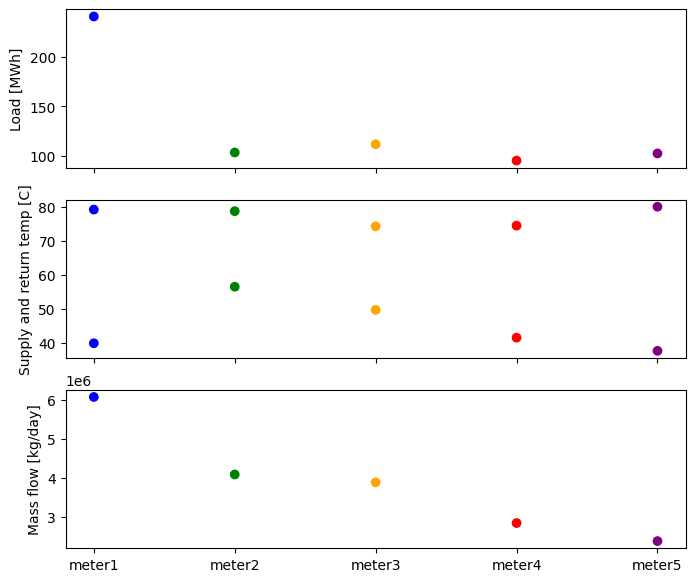

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,7))

# plt.subplots_adjust(hspace=0.1)

colors = ['blue', 'green', 'orange', 'red', 'purple']
meters = [f'meter{i}' for i in range(1,6)]

#First axis
x = np.arange(1,6)
ax1.scatter(x, [meter_data[i]['load'] for i in range(0,5)], c=colors)
ax1.set_ylabel('Load [MWh]')
# ax1.legend(fontsize=7)

#Second axis
ax2.scatter(x, [meter_data[i]['supply_temp'] for i in range(0,5)], c=colors)
ax2.scatter(x, [meter_data[i]['return_temp'] for i in range(0,5)], c=colors)
ax2.set_ylabel('Supply and return temp [C]')
# ax2.legend(fontsize=7)

#Third axis
ax3.scatter(x, [meter_data[i]['cum_water_mass'] for i in range(0,5)], c=colors)
ax3.set_ylabel('Mass flow [kg/day]')
# ax4.legend(fontsize=7)

tick_locations = [1, 2, 3, 4, 5]
ax3.set_xticks(tick_locations)
ax3.set_xticklabels(meters)

plt.plot()


In [5]:
#Check if total supply can meet demand
200 + 105 + 350 > sum([float(meter_data[i]['load']) for i in range(0,5)])

True

In [86]:
#Sets
N = [f'n{i}' for i in range(0,8)]
P = [f'p{i}' for i in range(0,7)] 
HS = [f'hs{i}' for i in range(0,3)]
HES = [f'hes{i}' for i in range(0,5)]
#Input values
coeff = 1.161389e-06 #MWh/kg/K
q = [200, 105, 350] #MWh
hs_cost = [50, 70, 30] 
hs_loc = ['n1', 'n4', 'n6']
hs_mf_max = 10**8 #kg/day

# l = [20, 35, 25, 50, 30] #MWh
hes_loc = ['n2', 'n3', 'n5', 'n7', 'n8'] #nodes where demands are present (not specific to each demand)

pipe_S_mf_max = 10**8 #kg/day
pipe_R_mf_max = 10**8 #kg/day

#Dictionary comprehensions
supply = {HS[i]: {'q':q[i], 'hs_cost':hs_cost[i], 'loc':hs_loc[i], 'max_flow':hs_mf_max} for i in range(0, len(HS))}
demand = {HES[i]: {'l':float(meter_data[i]['load']), 'mf':float(meter_data[i]['cum_water_mass'])} for i in range(0, len(HES))} #Location is unknown
pipe_S = {P[i]: {'nodeFrom':N[i], 'nodeTo':N[i+1], 'max_flow':pipe_S_mf_max} for i in range(0,len(P))}
pipe_R = {P[i]: {'nodeFrom':N[i+1], 'nodeTo':N[i], 'max_flow':pipe_R_mf_max} for i in range(0,len(P))}


In [87]:
Permutations = [f'perm{i}' for i in range(0,factorial(len(HES)))] #Set of permutations
D_perm = {Permutations[i]: {HES[j]: list(permutations(hes_loc))[i][j] for j in range(0,len(HES))} for i in range(0,factorial(len(HES)))}
# D_perm

### 1. Find feasible combinations (using load and temperature)
Input: heat supply, heat demand, nodal temperature (for HES) <br>
Output: feasible combinations of HES location

In [88]:
D_perm['perm0']

{'hes0': 'n2', 'hes1': 'n3', 'hes2': 'n5', 'hes3': 'n7', 'hes4': 'n8'}

In [89]:
# Given the network topology, if the supply cannot meet load, the load cannot be placed in that node
perm_status = {}
perm_feasible = []
for perm_i in Permutations:
    l_loc = {D_perm[perm_i][f'hes{i}']:float(meter_data[i]['load']) for i in range(0,len(HES))}
    q_loc = {hs_loc[i]:q[i] for i in range(0,len(HS))}
    #Heat flows
    hf34 = q_loc['n1'] - l_loc['n2'] - l_loc['n3']
    hf56 = hf34 + q_loc['n4'] - l_loc['n5']
    hf8 = hf56 + q_loc['n6'] - l_loc['n7'] - l_loc['n8']
    #Check for positive heat flows (supply is enough to meet the demand)
    if hf34 >= 0 and hf56 >=0 and hf8 >=0:
        perm_status[perm_i] = 'feasible'
        perm_feasible.append(perm_i)
    else:
        perm_status[perm_i] = 'infeasible'

print('Feasible permutations: ', perm_feasible)


# Down stream temperatures cannot have higher temperature unless there is a supply node

Feasible permutations:  ['perm76', 'perm82', 'perm88', 'perm89', 'perm100', 'perm106', 'perm112', 'perm113']


In [90]:
D_perm[perm_feasible[5]]

{'hes0': 'n8', 'hes1': 'n3', 'hes2': 'n7', 'hes3': 'n2', 'hes4': 'n5'}

### 2. Find optimal combination
Assumptions: 
1. T and mf of the loads are extracted from the load
2. T for supply nodes are also known
3. Load definition not required since all are parameters
4. Losses can be calculated ex-post

In [91]:
model_input = {
    'N': N,
    'P': P,
    'HS': HS,
    'supply': supply,
    'pipe_S': pipe_S,
    'pipe_R': pipe_R,
    'demand': demand,
    'D_perm': D_perm
}

In [92]:
def OHF(model_input, permutation):
    #Input
    N = model_input['N']
    P = model_input['P']
    HS = model_input['HS']
    supply = model_input['supply']
    pipe_S = model_input['pipe_S']
    pipe_R = model_input['pipe_R']
    demand = model_input['demand']
    D_perm = model_input['D_perm']

    #Model
    m_heat = gp.Model()

    #Add variables
    q = m_heat.addVars(HS, lb=0.0, name='q')
    mf_HS = m_heat.addVars(HS, lb=0.0, name='mf_HS')
    mf_S = m_heat.addVars(P, lb=0.0, name='mf_S')
    mf_R = m_heat.addVars(P, lb=0.0, name='mf_R')

    #Objective function
    m_heat.setObjective(sum(supply[hs]['hs_cost']*q[hs] for hs in HS), GRB.MINIMIZE)

    #Constraints
    #Mass flow upper bounds
    m_heat.addConstrs((mf_HS[hs] <= supply[hs]['max_flow'] for hs in HS), name='mf_HS upper bound')
    m_heat.addConstrs((mf_S[p] <= pipe_S[p]['max_flow'] for p in P), name='mf_S upper bound')
    m_heat.addConstrs((mf_R[p] <= pipe_R[p]['max_flow'] for p in P), name='mf_R upper bound')

    #q limit?

    #Nodal balance (supply)
    m_heat.addConstrs((sum(mf_S[p] for p in P if pipe_S[p]["nodeTo"] == n) #pipes ending at node n (reaching the node)
                    + sum(mf_HS[hs] for hs in HS if supply[hs]["loc"] == n) #heat supply at node n
                    == sum(mf_S[p] for p in P if pipe_S[p]["nodeFrom"] == n) #pipes starting at node n (leaving the node)
                    + sum(demand[hes]['mf'] for hes in HES if D_perm[permutation][hes] == n) #demand at node n   
                    for n in N), name = "nodal_bal_supply")

    #Nodal balance (return)
    m_heat.addConstrs((sum(mf_R[p] for p in P if pipe_R[p]["nodeFrom"] == n) #pipes starting at node n (leaving the node)
                    + sum(mf_HS[hs] for hs in HS if supply[hs]["loc"] == n) #heat supply at node n
                    == sum(mf_R[p] for p in P if pipe_R[p]["nodeTo"] == n) #pipes ending at node n (reaching the node)
                    + sum(demand[hes]['mf'] for hes in HES if D_perm[permutation][hes] == n) #demand at node n   
                    for n in N), name = "nodal_bal_return")

    #Supply definition
    m_heat.addConstrs((sum(q[hs] for hs in HS if supply[hs]["loc"] == n) 
                    == coeff*sum(mf_HS[hs] for hs in HS if supply[hs]["loc"] == n)*30
                    for n in N), name = "supply def")

    #Solve model
    m_heat.optimize()

    if m_heat.status == 3: #Infeasible
        print('Model infeasible!')
        m_result = {'obj': 'infeasible',
                    'permutation': permutation}

    elif m_heat.status == 2: #Feasible
        print('Model feasible!')
        m_result = {'obj': m_heat.ObjVal,
                    'permutation': permutation,
                    'mf_S': {p: mf_S[p].x for p in P},
                    'mf_R': {p: mf_R[p].x for p in P},
                    'mf_HS': {hs: mf_HS[hs].x for hs in HS},
                    'q': {hs: q[hs].x for hs in HS}}
    
    return m_result


In [93]:
m_result = {}
for perm in perm_feasible:
    m_result[perm] = OHF(model_input, perm)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 41 rows, 20 columns and 57 nonzeros
Model fingerprint: 0x5921fc9f
Coefficient statistics:
  Matrix range     [3e-05, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+06, 1e+08]
Presolve removed 41 rows and 20 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2541303e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.254130271e+04
Model feasible!
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 l

In [94]:
(min_obj, perm_min) = min([(m_result[perm]['obj'], perm) for perm in perm_feasible])
print('Min obj: ', min_obj)
print('At permutation: ', perm_min)

Min obj:  20243.633935892998
At permutation:  perm100


In [95]:
m_result[perm_max]

{'obj': 22541.302705713,
 'permutation': 'perm89',
 'mf_S': {'p0': 0.0,
  'p1': 9290120.0,
  'p2': 6920320.0,
  'p3': 4085710.0,
  'p4': 4085710.0,
  'p5': 0.0,
  'p6': 6081930.0},
 'mf_R': {'p0': 0.0,
  'p1': 9290120.0,
  'p2': 6920320.0,
  'p3': 4085710.0,
  'p4': 4085710.0,
  'p5': 0.0,
  'p6': 6081930.0},
 'mf_HS': {'hs0': 9290120.0, 'hs1': 0.0, 'hs2': 6081930.0},
 'q': {'hs0': 323.6832953004, 'hs1': 0.0, 'hs2': 211.9045980231}}

In [96]:
q = [200, 105, 350] #MWh

In [65]:
D_perm['perm89']

{'hes0': 'n7', 'hes1': 'n5', 'hes2': 'n8', 'hes3': 'n3', 'hes4': 'n2'}

In [66]:
[float(meter_data[i]['load']) for i in range(0,len(HES))]

[241.30999755859375,
 103.26000213623047,
 111.66000366210938,
 95.04000091552734,
 102.30999755859375]